In [1]:
import pandas as pd
import numpy as np

In [59]:
weather = pd.read_csv('./DataFolder/PRSA_data.csv')
# 数据预处理
date = pd.date_range(start="20100101", periods=weather.shape[0])
weather = pd.DataFrame(np.array(weather), index=date, columns=weather.columns)
weather = weather.drop(["No", "year", "month", "day", "hour", "cbwd", "Is", "Ir"], axis=1)
weather.head()

,pm2.5,DEWP,TEMP,PRES,Iws
2010-01-01,NaN,-21,-11.0,1021.0,1.79
2010-01-02,NaN,-21,-12.0,1020.0,4.92
2010-01-03,NaN,-21,-11.0,1019.0,6.71
2010-01-04,NaN,-21,-14.0,1019.0,9.84
2010-01-05,NaN,-20,-12.0,1018.0,12.97


# 算术运算

In [60]:
# 添加add
weather["Iws"].add(1.0)

2010-01-01      2.79
2010-01-02      5.92
2010-01-03      7.71
2010-01-04     10.84
2010-01-05     13.97
               ...  
2129-12-22    232.97
2129-12-23    238.78
2129-12-24     243.7
2129-12-25    247.72
2129-12-26    250.85
Freq: D, Name: Iws, Length: 43824, dtype: object

In [61]:
# 或者使用+
weather["Iws"] + 1

2010-01-01      2.79
2010-01-02      5.92
2010-01-03      7.71
2010-01-04     10.84
2010-01-05     13.97
               ...  
2129-12-22    232.97
2129-12-23    238.78
2129-12-24     243.7
2129-12-25    247.72
2129-12-26    250.85
Freq: D, Name: Iws, Length: 43824, dtype: object

# 逻辑运算<, >, |, &

## 单个逻辑运算

In [62]:
weather["Iws"] > 20

2010-01-01    False
2010-01-02    False
2010-01-03    False
2010-01-04    False
2010-01-05    False
              ...  
2129-12-22     True
2129-12-23     True
2129-12-24     True
2129-12-25     True
2129-12-26     True
Freq: D, Name: Iws, Length: 43824, dtype: bool

In [63]:
# 展示weather中Iws属性大于20的数据
weather[weather["Iws"] > 20]

,pm2.5,DEWP,TEMP,PRES,Iws
2010-01-08,NaN,-19,-9.0,1017.0,21.02
2010-01-09,NaN,-19,-9.0,1017.0,24.15
2010-01-10,NaN,-20,-8.0,1017.0,27.28
2010-01-11,NaN,-19,-7.0,1017.0,31.3
2010-01-12,NaN,-18,-5.0,1017.0,34.43
...,...,...,...,...,...
2129-12-22,8.0,-23,-2.0,1034.0,231.97
2129-12-23,10.0,-22,-3.0,1034.0,237.78
2129-12-24,10.0,-22,-3.0,1034.0,242.7
2129-12-25,8.0,-22,-4.0,1034.0,246.72


## 多重逻辑判断

In [64]:
weather[(weather["Iws"] > 20) & (weather["Iws"] < 40)]

,pm2.5,DEWP,TEMP,PRES,Iws
2010-01-08,NaN,-19,-9.0,1017.0,21.02
2010-01-09,NaN,-19,-9.0,1017.0,24.15
2010-01-10,NaN,-20,-8.0,1017.0,27.28
2010-01-11,NaN,-19,-7.0,1017.0,31.3
2010-01-12,NaN,-18,-5.0,1017.0,34.43
...,...,...,...,...,...
2129-11-02,22.0,-15,10.0,1012.0,36.65
2129-11-15,9.0,-14,-2.0,1017.0,22.8
2129-11-30,20.0,-12,4.0,1023.0,21.9
2129-12-01,8.0,-21,2.0,1025.0,31.73


## 逻辑运算函数

In [65]:
weather.query("Iws > 40 & Iws < 90")

,pm2.5,DEWP,TEMP,PRES,Iws
2010-01-14,NaN,-18,-3.0,1015.0,40.69
2010-01-15,NaN,-18,-2.0,1014.0,43.82
2010-02-12,170.0,-8,-5.0,1027.0,42.46
2010-02-13,149.0,-8,-5.0,1028.0,44.25
2010-02-14,154.0,-7,-5.0,1028.0,46.04
...,...,...,...,...,...
2129-07-15,10.0,-13,-3.0,1034.0,88.51
2129-12-03,10.0,-19,-1.0,1027.0,51.84
2129-12-04,11.0,-18,-1.0,1028.0,61.67
2129-12-05,20.0,-17,-1.0,1028.0,70.61


In [66]:
# 选择Iws属性中等于40.96, 42.46, 46.04的数据
weather = weather[weather["Iws"].isin([40.96, 42.46, 46.04])]

,pm2.5,DEWP,TEMP,PRES,Iws
2010-02-12,170.0,-8,-5.0,1027.0,42.46
2010-02-14,154.0,-7,-5.0,1028.0,46.04
2011-05-24,15.0,-20,-7.0,1036.0,42.46
2013-02-10,13.0,-19,-3.0,1027.0,42.46
2016-07-25,58.0,-5,10.0,1018.0,46.04
2022-04-14,44.0,18,30.0,1001.0,42.46
2024-03-09,41.0,20,24.0,1004.0,46.04
2024-12-26,81.0,19,24.0,1008.0,42.46
2024-12-28,114.0,19,23.0,1007.0,46.04
2028-10-29,16.0,-2,19.0,1020.0,42.46


In [69]:
# weather里面的数据是object类型，要转换为float类型
weather = pd.DataFrame(np.array(weather), index=weather.index, columns=weather.columns, dtype=float)
weather

,pm2.5,DEWP,TEMP,PRES,Iws
2010-02-12,170.0,-8.0,-5.0,1027.0,42.46
2010-02-14,154.0,-7.0,-5.0,1028.0,46.04
2011-05-24,15.0,-20.0,-7.0,1036.0,42.46
2013-02-10,13.0,-19.0,-3.0,1027.0,42.46
2016-07-25,58.0,-5.0,10.0,1018.0,46.04
2022-04-14,44.0,18.0,30.0,1001.0,42.46
2024-03-09,41.0,20.0,24.0,1004.0,46.04
2024-12-26,81.0,19.0,24.0,1008.0,42.46
2024-12-28,114.0,19.0,23.0,1007.0,46.04
2028-10-29,16.0,-2.0,19.0,1020.0,42.46


# 统计运算

## 综合描述分析：describe()函数

In [68]:
# describe默认只针对连续数值类型
weather.describe()

,pm2.5,DEWP,TEMP,PRES,Iws
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,63.080000,-0.400000,12.700000,1016.060000,44.536400
std,55.480403,14.242793,11.521497,10.310308,1.784878
min,6.000000,-23.000000,-7.000000,998.000000,42.460000
25%,16.250000,-10.750000,3.250000,1008.500000,42.460000
50%,45.500000,-3.000000,13.500000,1016.000000,46.040000
75%,86.250000,14.250000,24.000000,1024.500000,46.040000
max,204.000000,23.000000,36.000000,1036.000000,46.040000


## 常用的统计量
* max()、min()最大、最小值
* mean()均值
* std()、var()标准差、方差
* median()中位数
* mode()众数
* idxmax()、idxmin()最大、最小值索引
* sum()求和

In [71]:
print(weather.max())
print(weather.min())

pm2.5     204.00
DEWP       23.00
TEMP       36.00
PRES     1036.00
Iws        46.04
dtype: float64
pm2.5      6.00
DEWP     -23.00
TEMP      -7.00
PRES     998.00
Iws       42.46
dtype: float64


In [81]:
# 均值
weather.mean()

pm2.5      63.0800
DEWP       -0.4000
TEMP       12.7000
PRES     1016.0600
Iws        44.5364
dtype: float64

In [82]:
# 标准差和方差
print(weather.std())
print(weather.var())

pm2.5    55.480403
DEWP     14.242793
TEMP     11.521497
PRES     10.310308
Iws       1.784878
dtype: float64
pm2.5    3078.075102
DEWP      202.857143
TEMP      132.744898
PRES      106.302449
Iws         3.185791
dtype: float64


In [83]:
# 中位数
weather.median()

pm2.5      45.50
DEWP       -3.00
TEMP       13.50
PRES     1016.00
Iws        46.04
dtype: float64

In [84]:
# 众数
weather.mode()

,pm2.5,DEWP,TEMP,PRES,Iws
0,16.0,19.0,24.0,1010.0,46.04


In [85]:
# 最大最小值索引
print(weather.idxmax())
print(weather.idxmin())

pm2.5   2063-01-05
DEWP    2047-04-08
TEMP    2095-06-23
PRES    2011-05-24
Iws     2010-02-14
dtype: datetime64[ns]
pm2.5   2124-08-29
DEWP    2128-02-11
TEMP    2011-05-24
PRES    2095-06-23
Iws     2010-02-12
dtype: datetime64[ns]


In [80]:
# axis=1按照行求和，axis=0按照列求和
weather.sum(axis=0)

pm2.5     3154.00
DEWP       -20.00
TEMP       635.00
PRES     50803.00
Iws       2226.82
dtype: float64

## 累计统计函数
* cumsum()、cummax()、cummin()、cumprod()分别对应着前n项和、前n项最大数、最小数、前n项积

In [97]:
# 对PM2.5进行累计求和
pm2_5 = weather["pm2.5"]
cumPM2_5 = pm2_5.cumsum()
cumPM2_5

2010-02-12     170.0
2010-02-14     324.0
2011-05-24     339.0
2013-02-10     352.0
2016-07-25     410.0
2022-04-14     454.0
2024-03-09     495.0
2024-12-26     576.0
2024-12-28     690.0
2028-10-29     706.0
2030-05-27     722.0
2032-01-12     850.0
2036-01-29     892.0
2038-09-28     913.0
2042-09-09     940.0
2047-04-08    1056.0
2051-05-14    1089.0
2051-11-20    1109.0
2058-01-01    1131.0
2058-03-17    1146.0
2061-11-05    1321.0
2062-07-02    1398.0
2063-01-05    1602.0
2063-03-24    1789.0
2063-05-11    1826.0
2064-03-23    1837.0
2064-12-30    1898.0
2068-06-22    1972.0
2070-03-12    2047.0
2073-01-06    2117.0
2081-11-03    2133.0
2082-12-12    2194.0
2086-04-04    2398.0
2087-08-27    2424.0
2088-03-10    2535.0
2088-07-08    2546.0
2088-11-05    2602.0
2089-06-27    2611.0
2090-02-11    2699.0
2091-08-12    2746.0
2091-12-03    2851.0
2095-06-23    2868.0
2096-05-25    2900.0
2099-06-17    2908.0
2107-04-02    2924.0
2117-07-04    2978.0
2121-03-09    3049.0
2121-03-11   

<AxesSubplot:ylabel='Frequency'>

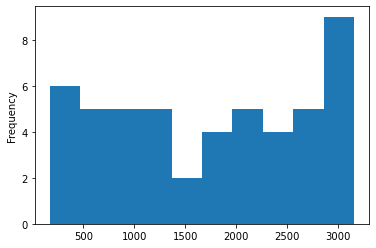

In [103]:
# DataFrame画图
# DataFrame.plot(x, y, kind='line')
# kind参数可选的还有hist、pie、bar、barh、scatter
cumPM2_5.plot(kind='hist')

# 自定义函数
* 使用apply和lambda结合的自定义运算

In [95]:
# 将Iws、DEWP这两列进行最大值和最小值计算
# axis=0默认是列
weather[['Iws', 'DEWP']].apply(lambda x:x.max() - x.min(), axis=0)

Iws      3.58
DEWP    46.00
dtype: float64